In [2]:
import os
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
from autoreject import AutoReject, Ransac
from autoreject.utils import interpolate_bads
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, find_bad_channels_maxwell
from IPython.display import display, HTML
%matplotlib qt

In [48]:
epoch = mne.io.read_epochs_eeglab("C:/Learn/Project/bylw/eeg/5/lal-hc-405-task.set")

Extracting parameters from C:\Learn\Project\bylw\eeg\5\lal-hc-405-task.set...
Not setting metadata
463 matching events found


C:\Users\24323\AppData\Local\Temp\ipykernel_58768\3403026867.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epoch = mne.io.read_epochs_eeglab("C:/Learn/Project/bylw/eeg/5/lal-hc-405-task.set")


No baseline correction applied
0 projection items activated
Ready.


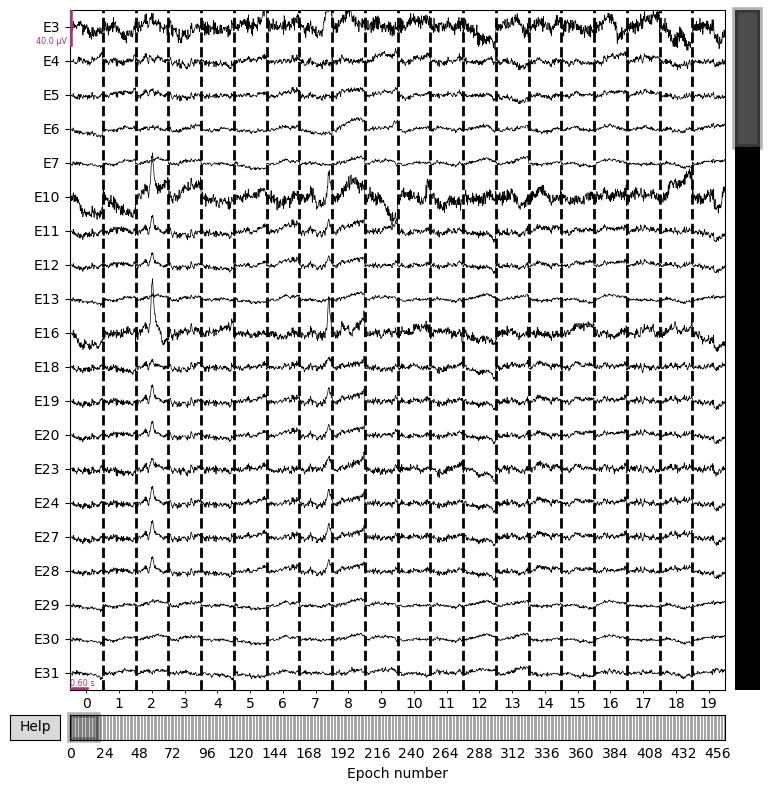

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [46]:
epoch.plot()

In [31]:
fig = epoch.compute_psd().plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


In [32]:
epoch

<EpochsEEGLAB | 479 events (all good), -0.2 – 0.998 s (baseline off), ~217.2 MiB, data loaded,
 '3   /Category 1/800 /4   ': 182
 '3   /Category 1/801 /4   ': 23
 '3   /800 /Category 1/4   ': 29
 '3   /801 /Category 1/4   ': 5
 '3   /Category 1/901 /4   ': 29
 '3   /Category 1/900 /4   ': 190
 '3   /900 /Category 1/4   ': 19
 '3   /901 /Category 1/4   ': 2>

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


No projector specified for this dataset. Please consider the method self.add_proj.


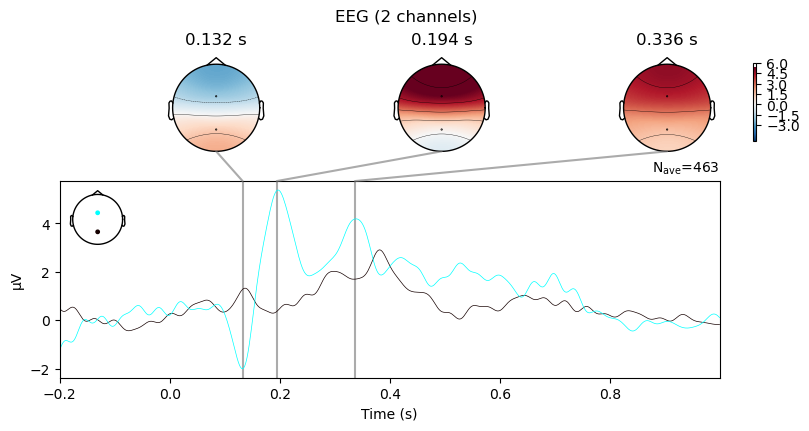

In [49]:
evoke = epoch.average()
evoke.pick(["E6", "E62"])
evoke.plot_joint() 

In [6]:
epoch.info['nchan']

99

In [10]:
epoch.info['custom_ref_applied']

0 (FIFFV_MNE_CUSTOM_REF_OFF)

In [11]:
epoch3 = mne.io.read_epochs_eeglab("C:/Learn/Project/bylw/eeg/3 remove epoch + baseline + relocation/lal-hc-405-task.set")
epoch3

Extracting parameters from C:\Learn\Project\bylw\eeg\3 remove epoch + baseline + relocation\lal-hc-405-task.set...


C:\Users\24323\AppData\Local\Temp\ipykernel_37084\4198920352.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epoch3 = mne.io.read_epochs_eeglab("C:/Learn/Project/bylw/eeg/3 remove epoch + baseline + relocation/lal-hc-405-task.set")


Not setting metadata
463 matching events found
No baseline correction applied
0 projection items activated
Ready.


<EpochsEEGLAB | 463 events (all good), -0.2 – 0.998 s (baseline off), ~209.9 MiB, data loaded,
 '3   /Category 1/800 /4   ': 33
 '3   /800 /Category 1/4   ': 168
 '3   /801 /Category 1/4   ': 31
 '3   /Category 1/801 /4   ': 3
 '3   /Category 1/900 /4   ': 42
 '3   /900 /Category 1/4   ': 159
 '3   /901 /Category 1/4   ': 20
 '3   /Category 1/901 /4   ': 7>